In [50]:
import pandas as pd
import numpy as np

## QQ2
 Bookmark this page
QQ2
0 points possible (ungraded)
The table shown below provides you with the actual demand of a product for weeks 1 through 15. You can download this data in the form of a comma separated values file using the link provided below.

In [5]:
data = pd.read_excel('L1V2-data.xlsx', names=['week', 'demand'])

In [9]:
data.tail()

,week,demand
11,Week 12,5.3
12,Week 13,5.0
13,Week 14,5.2
14,Week 15,6.0
15,Week 16,NaN


$$ \hat{d_{15,16}} = \alpha * d_{15} + (1-\alpha) * \hat{d_{14,15}} $$
$$ \hat{d_{15,16}} = \alpha * d_{15} + (1-\alpha) * (\alpha * d_{14} + (1-\alpha) * \hat{d_{13,14}}) $$
$$ = \alpha * d_{15} + \alpha(1-\alpha)*d_{14} + (1-\alpha)^2 * \hat{d_{13,14}} = ...$$

As you can see, the coefficient for the value for any given week i is as follows:

$$ c(i)= \alpha * (1-\alpha)^{15-i} $$

In [17]:
data['week_num'] = data['week'].apply(lambda x: int(x.split()[-1]))
alpha = 0.7
data['c'] = data['week_num'].apply(lambda i: alpha * (1-alpha)**(15-i))
data_15_16 = (data['demand'] * data['c']).sum()
print(data.head())
data_15_16

     week  demand  week_num             c
0  Week 1     1.0         1  3.348078e-08
1  Week 2     4.0         2  1.116026e-07
2  Week 3     6.3         3  3.720087e-07
3  Week 4     7.8         4  1.240029e-06
4  Week 5     8.8         5  4.133430e-06


5.755542420196233

## QQ3
0 points possible (ungraded)

Consider the data in the table shown below. (This is the same data you saw in the previous video.)



$$ a_{101} = \alpha x_{101} + (1-\alpha)(\hat{a_{100}} + \hat{b_{100}}) $$


In [29]:
x = dict()
a = dict()
b = dict()
x_hat = dict() # x_hat[t] means the prediction for t+1 at time t

x[100] = 92
a[100] = 90
b[100] = 8.5
x_hat[100] = 98.5
x[101] = 95

alpha = 0.25
beta = 0.08
tau = 4

t=101
a[t] = alpha * x[t] + (1-alpha) * (a[t-1] + b[t-1])
b[t] = beta * (a[t] - a[t-1]) + (1-beta) * b[t-1]
x_hat[105] = a[101] + tau * b[101]

print(x_hat[105])

131.345


## QQ4
 Bookmark this page
QQ4

The month of November is over, and by now we know that the actual demand for SKU #VMI1984 during this period was 35 units. Examine the data shown below. You can download it in the form of a comma separated values file using the link provided below.

### Part 1
0 points possible (ungraded)
Assume that Alpha=0.25 and Beta = 0.10. Use a level and trend exponential smoothing approach to forecast the demand for December (t=11).

In [34]:
data = pd.read_excel('L1V4-data.xlsx', header=4)
alpha = 0.25
beta = 0.1
omega = 0.05

In [35]:
data

,t,x(t),a^(t),b^(t),"x^(t,t+1)",e(t),e(t)^2,MSE
October,9,36,36.82,1.09,37.91,-1.1,1.2,4.52
November,10,35,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
a_hat_9 = 36.82
b_hat_9 = 1.09
x_10 = 35
alpha = 0.25
beta = 0.1
a_hat_10 = alpha * x_10 + (1-alpha) * (a_hat_9+b_hat_9)
b_hat_10 = beta * (a_hat_10 - a_hat_9) + (1-beta) * b_hat_9
x_hat_10_11 = a_hat_10 + b_hat_10
x_hat_10_11

38.19975

### Part 2
0 points possible (ungraded)
Still assuming Alpha=0.25 and Beta = 0.10, now let Omega=0.05. Use exponential smoothing to forecast the mean square error (MSE) for November (t=10) demand forecast.



In [40]:
x_10 = 35
x_hat_9_10 = 37.91
mse_9 = 4.52
omega = 0.05

mse_10 = omega * (x_10 - x_hat_9_10) ** 2 + (1-omega) * mse_9
mse_10

4.7174049999999985

In [42]:
alpha = 0.25
beta = 0.1
phi = 0.9

a_hat_9 = 35.31
b_hat_9 = 0.52

a_hat_10 = alpha * x_10 + (1-alpha) * (a_hat_9 + phi * b_hat_9)
b_hat_10 = beta * (a_hat_10 - a_hat_9) + (1-beta) * phi * b_hat_9
x_hat_10_11 = a_hat_10 + b_hat_10
x_hat_10_11

36.03205

## PP1: Shah Alam Palm Oil Company
 Bookmark this page
Palm oil is harvested from the fruit of oil palm trees and is widely used as a cooking oil throughout Africa, Southeast Asia, and parts of Brazil.  It is becoming widely used throughout the world as it is a lower cost alternative to other vegetable oils and has other attractive properties.  

You are working for the Shah Alam Palm Oil Company (SAPOC) that harvests, processes, and sells palm oil throughout the region.  You are asked to review the sales volume (in pounds) of your premium palm oil by one of your customers, a local grocery store in the region.

Download the spreadsheets with the monthly sales volume of palm oil here:

In Excel format (link to ShahAlamPalmOil_Data.xlsx)

In LibreOffice format (link ShahAlamPalmOil_Data.ods)

### Part 1
0 points possible (ungraded)
Take a look at the data and chart or plot the demand (vertical axis) against the months (horizontal axis). Do you detect any type of trend over the last three years?

In [78]:
data = pd.read_excel('ShahAlamPalmOil_Data.xlsx', names=['month', 'year', 'demand'])

In [79]:
data.tail()

,month,year,demand
31,Aug,2014,1746
32,Sep,2014,909
33,Oct,2014,1773
34,Nov,2014,2000
35,Dec,2014,1512


In [84]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

data['date_str'] = data[['year', 'month']].apply(lambda x: '-'.join([str(e) for e in x]), axis=1)
data['date'] = pd.to_datetime(data['date_str'])
data.sort_values(by=['date'], inplace=True)
data.tail()

,month,year,demand,date_str,date
31,Aug,2014,1746,2014-Aug,2014-08-01
32,Sep,2014,909,2014-Sep,2014-09-01
33,Oct,2014,1773,2014-Oct,2014-10-01
34,Nov,2014,2000,2014-Nov,2014-11-01
35,Dec,2014,1512,2014-Dec,2014-12-01


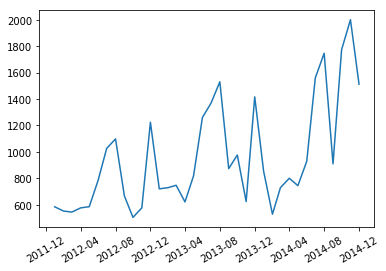

In [85]:
plt.plot(data['date'], data['demand'])
plt.xticks(rotation=30)
plt.show()

### Part 3
0 points possible (ungraded)
What is the forecast for demand in January 2015 . . .

using a naive model?

In [88]:
pred_naive = data.tail(1)['demand']
print(pred_naive)
pred_cumulative = data['demand'].mean()
print(pred_cumulative)
pred_moving_average = data['demand'][-12:].mean()
print(pred_moving_average)

35    1512
Name: demand, dtype: int64
957.9444444444445
1173.6666666666667


### Part 4
What is the root mean square error (RMSE) for a next period forecast for these three years of demand . . .

using a Naive model?

In [143]:
data['pred_naive'] = data['demand'].shift(1)
mse = ((data['demand'] - data['pred_naive'])**2)
print(np.sqrt(mse.mean()))

383.728177602


In [154]:
def myfunc(row):
    idx = row.name
    pred = data['demand'][:idx].mean()
    return pred
data['pred_cum'] = data.apply(myfunc, axis=1)
mse = ((data['demand'] - data['pred_cum'])**2)
print(np.sqrt(mse.mean()))

419.885131575


In [150]:
data.tail()

,month,year,demand,date_str,date,pred_naive,pred_cum,pred_12mv
31,Aug,2014,1746,2014-Aug,2014-08-01,1560.0,856.322581,963.583333
32,Sep,2014,909,2014-Sep,2014-09-01,1746.0,884.125000,981.583333
33,Oct,2014,1773,2014-Oct,2014-10-01,909.0,884.878788,984.583333
34,Nov,2014,2000,2014-Nov,2014-11-01,1773.0,911.000000,1051.000000
35,Dec,2014,1512,2014-Dec,2014-12-01,2000.0,942.114286,1165.666667


In [151]:
mse = (data['demand'] - data['pred_cum'])**2
print(np.sqrt(mse.mean()))

419.885131575


In [155]:
def myfunc(row):
    idx = row.name
    if idx <=11:
        return None
    return data['demand'][idx-12:idx].mean()

data['pred_12mv'] = data.apply(myfunc, axis=1)

In [156]:
error = data['demand'] - data['pred_12mv']
np.sqrt((error**2).mean())

423.32999164800941

## PP2: Forecasting Ordroid Demand
 Bookmark this page
You have just been hired by a company that manufactures mid-range communication devices that use the Ordroid open source operating system.  The company is focused on innovating its products and has not put much thought on its inventory or forecasting capabilities.   Your boss thinks there might be a problem in the forecasting of the Ordroid Devices and wants you to figure it out.  The Ordroid, far from being new to the market, has been out for two years. 

Knowing this, you have asked for data on both years of historical sales as well as any forecasts, promotions, pricing changes, or competitive analyses made during this time.  Your boss laughs and provides you with all the data they have: the last six months of sales.  You ask to meet with the current demand planner for the Ordroid Devices and she tells you that they use a forecasting algorithm of her own design and there is no documentation.  

Download the spreadsheets with the data here:

In Excel format (link to Ordroid_Data.xlsx)

In LibreOffice format (link Ordroid_Data.ods)

### Part 1

What can you say about the presence of seasonality in the demand?

In [182]:
data = pd.read_excel('Ordroid_Data.xlsx', names=['month', 'actual', 'forecast'])
# data['date'] = data['month'].apply(lambda x: '2016' + x)
data.head()

,month,actual,forecast
0,May,1509,1900
1,June,1610,1200
2,July,1708,2100
3,August,1866,1300
4,September,2092,2500


In [172]:
data['date'] = pd.to_datetime(data['month'], format='%B')

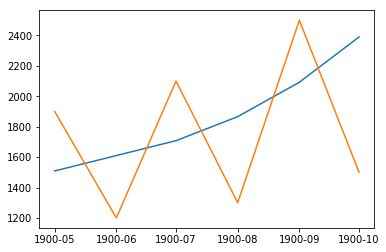

In [180]:
plt.plot(data['date'], data['actual'], label="demand")
plt.plot(data['date'], data['forecast'], label="forecast")

## PP3: Call Center Demand
 Bookmark this page
PP3: Call Center Demand
The number of service calls made to your firm’s call center over the last six weeks is shown in the table below.



### Part 1
0 points possible (ungraded)
What is the forecast for week 7 using a 2 period Moving Average model?

In [214]:
x = [83.0, 106.0, 95.0, 91.0, 110.0, 108.0]
print(np.sum(x[-2:])/2)

109.0


In [216]:
for i in range(len(x), 12):
    x_next = (np.sum(x[-2:])) / 2
    x.append(x_next)
    print(len(x))
    print(x)

12
[83.0, 106.0, 95.0, 91.0, 110.0, 108.0, 109.0, 108.5, 108.75, 108.625, 108.6875, 108.65625]


In [218]:
x = [83.0, 106.0, 95.0, 91.0, 110.0, 108.0]
x[0] = 110
print(np.sum(x[-2:])/2)

109.0


## PP4: TrainMax
 Bookmark this page
TrainMax is a manufacturer of high-end specialty engine equipment for high speed trains.  They produce parts that are sent to manufacturers for manufacturing new engines.  They need to forecast the demand for a particular part, XC-288. 

You can download the spreadsheets with the recent demand data for XC-288 from here (link to TrainMax_Data.xlsx).

### Part 1
0 points possible (ungraded)
What is the coefficient of variation of the demand?

In [224]:
data = pd.read_excel('TrainMax_Data.xlsx', names=['period', 'actual'])
data.head()

,period,actual
0,1,1027
1,2,1008
2,3,1130
3,4,1182
4,5,1074


In [228]:
import scipy.stats
var = scipy.stats.variation(data['actual'])
print(var)
print(np.std(data['actual'])/np.mean(data['actual']))

0.0547293994391
0.05472939943912606


In [229]:
data.tail()

,period,actual
9,10,1110
10,11,1014
11,12,1149
12,13,1121
13,14,1169


In [230]:
data['actual'].mean()

1103.7857142857142

In [231]:
data['actual'][-2:].mean()

1145.0

In [241]:
data['actual'][-4:].mean()

1113.25

In [266]:
def f_naive(r):
    if r.name-1 < 0:
        return None
    return data['actual'][r.name-1].mean()
data['fc_n'] = data.apply(f_naive, axis=1)


def f_cum(r):
    return data['actual'][:r.name].mean()
data['fc_cum'] = data.apply(f_cum, axis=1)

def f_2ma(r):
    if r.name-2 < 0:
        return None
    return data['actual'][r.name-2:r.name].mean()
data['fc_2ma'] = data.apply(f_2ma, axis=1)

def f_4ma(r):
    if r.name-4 < 0:
        return None
    return data['actual'][r.name-4:r.name].mean()
data['fc_4ma'] = data.apply(f_4ma, axis=1)

def mape(f, a):
    return 100 * np.abs((f-a)/a).mean()

data

,period,actual,fc_naive,fc_cum,f_2ma,f_4ma,fc_2ma,fc_4ma,fc_n
0,1,1027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1008,1027.0,1027.000000,NaN,NaN,NaN,NaN,1027.0
2,3,1130,1008.0,1017.500000,1103.785714,NaN,1017.5,NaN,1008.0
3,4,1182,1130.0,1055.000000,1109.692308,NaN,1069.0,NaN,1130.0
4,5,1074,1182.0,1086.750000,1118.166667,1103.785714,1156.0,1086.75,1182.0
5,6,1189,1074.0,1084.200000,1117.090909,1109.692308,1128.0,1098.50,1074.0
6,7,1043,1189.0,1101.666667,1110.600000,1118.166667,1131.5,1143.75,1189.0
7,8,1085,1043.0,1093.285714,1114.666667,1117.090909,1116.0,1122.00,1043.0
8,9,1152,1085.0,1092.250000,1105.375000,1110.600000,1064.0,1097.75,1085.0
9,10,1110,1152.0,1098.888889,1114.285714,1114.666667,1118.5,1117.25,1152.0


In [267]:
print(mape(data['fc_n'], data['actual']))
print(mape(data['fc_cum'], data['actual']))
print(mape(data['fc_2ma'], data['actual']))
print(mape(data['fc_4ma'], data['actual']))

7.084462744930285
5.13422811301949
6.464208239735962
4.792515837044496


## PP5: Calculators at the MIT Coop

Bookmark this page
During your first semester at MIT, you decide to make some pocket money by working a few hours every week at the Kendall Square store of the Harvard/MIT Cooperative (known as The Coop). Since you are a bit of a calculator geek, the store manager of The Coop in Kendall assigns you to their scientific calculator section of the store, and puts you in charge of keeping the most popular calculators on the shelves.

A quick look at the inventory the store keeps of different calculator models reveals that they have several boxes of inventory of some models and just a few of others. “What if we run out?” you ask yourself. The realization that keeping the most popular calculators on the shelves is more complicated than just opening boxes from the storage room sets you on a path to analyze the demand of calculators.

In order to better understand the demand for different best-selling calculator models, you ask the store manager for recent sales data. She promises she will get you this data. Soon after, you get an email from her with an attachment. “As promised, I have compiled for you the sales data for the past three months, aggregated by week, of our more popular calculator models. I hope this helps. Let me know what you find.”

Please enter all your numerical answers with 4 significant figures.

Download the spreadsheet with the data here:

In Excel format (link CoopCalcData.xlsx here)

In [278]:
data = pd.read_excel('CoopCalcData.xlsx')

In [279]:
data

,t (weeks),TI-89 Titanium,TI Nspire CX CAS,HP 50G,HP Prime,Casio FX9750,Casio Prizm
0,1,29,8,24,0,19,18
1,2,28,14,22,0,15,29
2,3,28,18,22,0,16,25
3,4,29,20,21,0,16,35
4,5,29,30,20,5,19,40
5,6,28,39,22,12,19,45
6,7,26,45,21,18,15,49
7,8,26,44,22,28,19,42
8,9,25,51,22,44,18,31
9,10,26,59,22,51,17,30


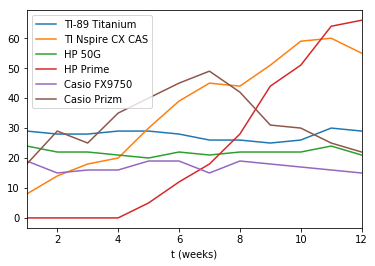

In [286]:
data.plot(x=0, y=data.columns[1:])

### Part 2
0 points possible (ungraded)
Build a simple exponential smoothing model for the demand of the TI-89 Titanium. Use an alpha value of 0.333. What is your forecast for next week’s (t=13) demand of TI-89 Titanium? (Round your answer to the nearest whole number.) Assume that the forecast for period 1 is equal to the actual demand in period 1, that is, x^0,1 = 29.

In [298]:
alpha = 0.333
def c(r):
    return alpha * (1-alpha)**(12 - r['t (weeks)'])

data['c'] = data.apply(c, axis=1)
res = (data['c'] * data['TI-89 Titanium']).sum()
print(data)
print(res)

    t (weeks)  TI-89 Titanium  TI Nspire CX CAS  HP 50G  HP Prime  \
0           1              29                 8      24         0   
1           2              28                14      22         0   
2           3              28                18      22         0   
3           4              29                20      21         0   
4           5              29                30      20         5   
5           6              28                39      22        12   
6           7              26                45      21        18   
7           8              26                44      22        28   
8           9              25                51      22        44   
9          10              26                59      22        51   
10         11              30                60      24        64   
11         12              29                55      21        66   

    Casio FX9750  Casio Prizm         c  
0             19           18  0.003871  
1             15  

In [300]:
def c(r, alpha):
    return alpha * (1-alpha)**(12 - r['t (weeks)'])

data['c'] = data.apply(lambda x: c(x, alpha=0.1), axis=1)
res = (data['c'] * data['TI-89 Titanium']).sum()
print(res)

data['c'] = data.apply(lambda x: c(x, alpha=0.5), axis=1)
res = (data['c'] * data['TI-89 Titanium']).sum()
print(res)


data['c'] = data.apply(lambda x: c(x, alpha=0.9), axis=1)
res = (data['c'] * data['TI-89 Titanium']).sum()
print(res)

19.864212449141
28.468017578125
29.059102098981


## Part 4

Build a level and trend exponential smoothing model for the demand of the Casio Prizm. Use the following smoothing factors and values to initialize the model:



Recall that the Alpha parameter is used for smoothing the level estimate, the Beta parameter is used for smoothing the trend estimate, and the Omega parameter is used for smoothing the MSE of the forecasts. 

You can download these values in the form of a spreadsheet here:

In Excel format (link Prizm-Data.xlsx here)

In LibreOffice format (link Prizm-Data.ods here)

### Part 4a
0 points possible (ungraded)
What is your forecast for next week’s (t=13) demand of Casio Prizm in the Kendall Coop store? (Round your answer to the nearest integer.)

Enter your answer here:

In [46]:
data = pd.read_excel('Prizm-Data.xlsx', skiprows=5, 
                     names=['col1', 't', 'demand', 'a', 'b', 'x', 'e', 'e2', 'mse_est', 'rmse_est'])
data.drop(['col1'], axis=1, inplace=True)

,t,demand,a,b,x,e,e2,mse_est,rmse_est
0,1,18,18.0,7.0,25.0,4.0,16.0,16.0,4.0
1,2,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
alpha = 0.5
beta = 0.33
omega = 0.20

def f(r):
    idx = r.name
    if idx-1 < 0:
        return 0
    a_p, b_p, x_p, mse_est_p = data.iloc[idx -1].loc[['a', 'b', 'x', 'mse_est']]
    x_c = data.iloc[idx].loc['demand']
    
    a_c = alpha * x_c + (1-alpha) * (a_p + b_p)
    b_c = beta * (a_c - a_p) + (1-beta) * b_p
    #x_hat_c: represent the current estimation for next time step
    x_hat_c = a_c + b_c
    
    e = x_c - x_p
    e2 = e**2
    
    mse_est = omega * (x_c - x_p)**2 + (1-omega) * mse_est_p
    rmse_est = np.sqrt(mse_est)
    
    data.set_value(index=idx, col='a', value=a_c)
    data.set_value(index=idx, col='b', value=b_c)
    data.set_value(index=idx, col='x', value=x_hat_c)
    data.set_value(index=idx, col='e', value=e)
    data.set_value(index=idx, col='e2', value=e2)
    data.set_value(index=idx, col='mse_est', value=mse_est)
    data.set_value(index=idx, col='rmse_est', value=rmse_est)

data.apply(f, axis=1)

data

,t,demand,a,b,x,e,e2,mse_est,rmse_est
0,1,18,18.000000,7.000000,25.000000,4.000000,16.000000,16.000000,4.000000
1,2,29,27.000000,7.660000,34.660000,4.000000,16.000000,16.000000,4.000000
2,3,25,29.830000,6.066100,35.896100,-9.660000,93.315600,31.463120,5.609200
3,4,35,35.448050,5.918243,41.366293,-0.896100,0.802995,25.331095,5.033001
4,5,40,40.683147,5.692805,46.375952,-1.366293,1.866758,20.638228,4.542932
5,6,45,45.687976,5.465773,51.153749,-1.375952,1.893243,16.889231,4.109651
6,7,49,50.076874,5.110404,55.187279,-2.153749,4.638634,14.439112,3.799883
7,8,42,48.593639,2.934503,51.528143,-13.187279,173.904325,46.332154,6.806773
8,9,31,41.264071,-0.452640,40.811431,-20.528143,421.404650,121.346653,11.015746
9,10,30,35.405716,-2.236526,33.169189,-10.811431,116.887047,120.454732,10.975187


### Part 6a
0 points possible (ungraded)
Build an exponential smoothing approach with damped trends to forecast the demand for the HP Prime. Use the smoothing factors and values found below to initialize the model.



You can download these values in the form of a spreadsheet here:

•	In Excel format (link Prime-Data.xlsx here)

•	In LibreOffice format (link Prime-Data.ods here)

What is your forecast for next week’s (t=13) demand of HP Prime in the Kendall Coop store? (Round your answer to the nearest integer.)

In [80]:
data = pd.read_excel('Prime-Data.xlsx', skiprows=4, names=['t', 'demand', 'a', 'b', 'x'])

In [81]:
alpha = 0.5
beta = 0.33 
phi = 0.75
data

,t,demand,a,b,x
0,5,5,5.0,5.0,NaN
1,6,12,NaN,NaN,NaN
2,7,18,NaN,NaN,NaN
3,8,28,NaN,NaN,NaN
4,9,44,NaN,NaN,NaN
5,10,51,NaN,NaN,NaN
6,11,64,NaN,NaN,NaN
7,12,66,NaN,NaN,NaN


#### Approach 1

In [82]:
a_5 = 5 
b_5 = 5
x_5_13 = a_5 + b_5 * (np.sum([phi**i for i in range(1, 9)]))
print(x_5_13)

18.4983062744


#### Approach 2

In [85]:
# x_c_n is the current estimation at time t for time step t+1, c:current, n:next
def f(r):
    idx = r.name
    
    if idx-1 <0:
        return 0
    
    a_p, b_p, x_p = data.iloc[idx-1].loc[['a', 'b', 'x']]
    
    x_c = data.iloc[idx].loc['demand']

    a_c = alpha * x_c + (1-alpha)*(a_p + phi * b_p)
    b_c = beta * (a_c - a_p) + (1-beta) * phi * b_p
    x_hat_c = a_c + b_c * phi
    
    data.set_value(index=idx, col='a', value=a_c)
    data.set_value(index=idx, col='b', value=b_c)
    data.set_value(index=idx, col='x', value=x_hat_c)
    
data.apply(f, axis=1)

data.set_value(index=0, col='x', value=data.iloc[0]['a'] + phi*data.iloc[0]['b'])

data

,t,demand,a,b,x
0,5,5,5.000000,5.000000,8.750000
1,6,12,10.375000,4.286250,13.589688
2,7,18,15.794844,3.942389,18.751636
3,8,28,23.375818,4.482772,26.737897
4,9,44,35.368948,6.210326,40.026693
5,10,51,45.513346,6.468340,50.364602
6,11,64,57.182301,7.101096,62.508123
7,12,66,64.254061,5.901982,68.680548
